### PHYS247-Winter 2021: Homework 4 solution

### TA: Amartya Mitra

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,f1_score,precision_score,recall_score,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.utils import np_utils
from keras.optimizers import Adam

##Importing the data file

In [ ]:
Data=pd.read_csv('LendingClub.csv')

###Checking the column names of the imported data files. "Dtype: object" are string format data i.e. categorical

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395219 entries, 0 to 395218
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   loan_status           395219 non-null  object 
 10  purpose               395219 non-null  object 
 11  dti                   395219 non-null  float64
 12  earliest_cr_line      395219 non-null  object 
 13  open_acc              395219 non-null  float64
 14  pub_rec               395219 non-null  float64
 15  

Is there a missing value in the imported dataset?

In [ ]:
Data.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

So, we have no missing values in this dataset. 

The target variable in this problem is "loan_status" which is categorical data. We will use integer encoding through the "get_dummies()" function of Pandas to transform this data into numerical data. We will also drop the first dummy variable since it can be inferred from other variables.

In [ ]:
Data['loan_status']=pd.get_dummies(Data['loan_status'],drop_first=True)

Extract number of months from "term" column. Original data is in string format. The "apply" function acts on the "term" column of the Data to extract out the number of months in a "int" format.

In [ ]:
Data['term'] = Data['term'].apply(lambda term: int(term[:3])).astype('int64')

Extract zipcode from "address" column. Original data is in string format. Last 5 characters of string contains the zip-code. The "apply" function again extracts out those 5 digits using :-5 convention, and returns and integer value.

In [ ]:
Data['address'] = Data['address'].apply(lambda address:address[-5:])

Extract the year of first credit account from 'earliest_cr_line' column.

In [ ]:
Data['earliest_cr_line'] = Data['earliest_cr_line'].apply(lambda year:year[-4:]).astype('int64')

Use integer encoding for all other categorical variables.

The information in grade column is already embedded in sub-grade column.  So, we can drop this column from the features.

In [ ]:
Data = Data.drop('grade',axis=1)

In [ ]:
Data = pd.concat([Data,pd.get_dummies(Data.select_dtypes(include=['object']),drop_first=True)],axis=1)

In [ ]:
Data = Data.drop(Data.select_dtypes(include=['object']).columns,axis=1)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395219 entries, 0 to 395218
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   loan_status                          395219 non-null  uint8  
 6   dti                                  395219 non-null  float64
 7   earliest_cr_line                     395219 non-null  int64  
 8   open_acc                             395219 non-null  float64
 9   pub_rec                              395219 non-null  float64
 10  revol_bal                            395219 non-null  float64
 11  revol_util   

Now, let's define input and output variables: (selecting all data columns barring 'loan_status' to be X and the 'loan_status' to be the labels y)

In [ ]:
X = Data.drop('loan_status',axis=1).values
y = Data['loan_status'].values

Perfoming a split of the X & y variables above to generate the train and test data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Data normalization: (This is only done on the X data. Why? Different data aspects or "features" can have different scales which hurts predictive performace. The normalization helps in making them uniform for better prediction)

In [ ]:
scaler = MinMaxScaler()

The scaler.fit_transform() determines the "normalization constants" μ and σ, from the training data set and normalizes the same accordingly. The scaler.transform() reuses the above found μ and σ to normalize the test data rather than re-computing them freshly for the test set.

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape[1]

80

Building a neural network model:
The Sequential() command specifies this is a feed-forward network, other options can be Convolutional, RNNs etc. The Dense() command specifies all the neural network to be fully connected. Dropout() is a regularization technique which prevents over-fitting to training data. Adam is a specific optimizer choice in neural networks, other options are sgd (stochastic gradient descent), rmsprop etc.

In [ ]:
model=Sequential()

model.add(Dense(X_train.shape[1],  activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=32,epochs=10)

Train on 276653 samples, validate on 118566 samples
Epoch 1/10
276653/276653 [==============================] - 18s 67us/step - loss: 0.2746 - accuracy: 0.8862 - val_loss: 0.2632 - val_accuracy: 0.8869
Epoch 2/10
276653/276653 [==============================] - 17s 62us/step - loss: 0.2628 - accuracy: 0.8885 - val_loss: 0.2630 - val_accuracy: 0.8869
Epoch 3/10
276653/276653 [==============================] - 17s 61us/step - loss: 0.2616 - accuracy: 0.8884 - val_loss: 0.2630 - val_accuracy: 0.8869
Epoch 4/10
276653/276653 [==============================] - 14s 50us/step - loss: 0.2612 - accuracy: 0.8883 - val_loss: 0.2618 - val_accuracy: 0.8875
Epoch 5/10
276653/276653 [==============================] - 14s 52us/step - loss: 0.2607 - accuracy: 0.8884 - val_loss: 0.2619 - val_accuracy: 0.8875
Epoch 6/10
276653/276653 [==============================] - 17s 62us/step - loss: 0.2603 - accuracy: 0.8884 - val_loss: 0.2624 - val_accuracy: 0.8869
Epoch 7/10
276653/276653 [======================

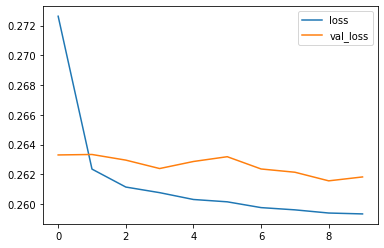

In [ ]:
history=pd.DataFrame(model.history.history)
history[['loss','val_loss']].plot()

In [ ]:
predictions = model.predict_classes(X_test)

Confusion Matrix: Composed of True Positive, False Positive, True Negative and False Negative

In [ ]:
print('confusion_matrix=\n',confusion_matrix(y_test,predictions))

confusion_matrix=
 [[10320 13043]
 [  279 94924]]


Accuracy: $$\frac{\text{True Positive} + \text{True Negative}}{\text{True Positive} + \text{True Negative} + \text{False Positive} + \text{False Negative}}$$

In [ ]:
print('accuracy_score=',accuracy_score(y_test,predictions))

accuracy_score= 0.887640638969013


Recall: $$\frac{\text{True Positive}}{\text{True Positive} + \text{False Negative}}$$

In [ ]:
print('recall_score=',recall_score(y_test,predictions))

recall_score= 0.9970694200813


$$F_1\text{ score} = 2\frac{\text{precision}\cdot\text{recall}}{\text{precision}+\text{recall}}$$

In [ ]:
print('f1_score=',f1_score(y_test,predictions))

f1_score= 0.9344292956637299


Precision: $$\frac{\text{True Positive}}{\text{True Positive} + \text{False Positive}}$$

In [ ]:
print('precision_score=',precision_score(y_test,predictions))

precision_score= 0.8791945687108098


or we can get the full report using "classification_report" of sklearn.

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.44      0.61     23363
           1       0.88      1.00      0.93     95203

    accuracy                           0.89    118566
   macro avg       0.93      0.72      0.77    118566
weighted avg       0.90      0.89      0.87    118566

